In [43]:
#!pip install qiskit==0.46


Given the complexity of encoding high-dimensional vectors for a quantum vector search and the constraints of current quantum simulation capabilities, we will design an end-to-end implementation that illustrates the core principles of quantum search using Grover's algorithm with Qiskit. 

Given the challenge of encoding high-dimensional vectors (e.g., 384-dimensional) directly, we'll work with a simplified, conceptual example. We'll represent our "vectors" as quantum states in a 2-qubit system, which naturally limits us to a search space of 4 states (|00⟩, |01⟩, |10⟩, and |11⟩). 

In a real-world application, encoding and preparation techniques would need to address dimensionality and normalization constraints.

Module 1: Encoding the Search Space

In [85]:
from qiskit import QuantumCircuit

def encode_search_space(circuit, qubits):
    """
    Prepares an equal superposition of all states to represent the search space.
    This encoding assumes a uniform distribution over the search space.
    """
    circuit.h(qubits)


Module 2: Oracle Definition

In [86]:
def oracle(circuit, control_qubits):
    """
    Oracle that marks the target state by applying a phase flip.
    Example: Marks the |11> state as the target.
    """
    circuit.cz(control_qubits[0], control_qubits[1])  # This example marks |11>


Module 3: Grover's Diffusion Operator

In [87]:
def diffusion_operator(circuit, qubits):
    """
    Implements Grover's diffusion operator for amplifying the probability amplitude of the marked state.
    """
    circuit.h(qubits)
    circuit.z(qubits)
    circuit.cz(qubits[0], qubits[1])  # Adds a phase flip if both qubits are 1
    circuit.h(qubits)


Module 4: Optimal Number of Grover Iterations

In [88]:
import numpy as np

def optimal_iterations(num_items):
    """
    Estimates the optimal number of Grover iterations based on the total number of items in the search space.
    """
    return int(np.round(np.pi / 4 * np.sqrt(num_items)))


Now, let's create a simple test scenario where we have a small search space, making it feasible to run a full quantum simulation using Qiskit. We'll simulate searching for a specific state in a 4-state system (2 qubits).

/var/folders/dx/g396tl5116vgs1d_mtwjdcn00000gn/T/ipykernel_10327/3927215428.py:25: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend, shots=1024).result()


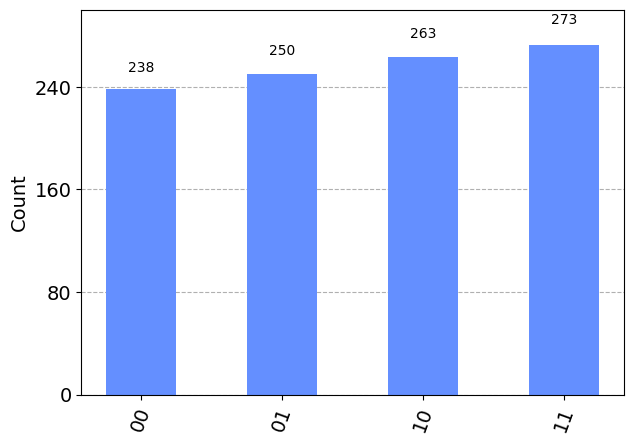

In [89]:
from qiskit import Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# Creating a quantum circuit with 2 qubits for the search space and 2 classical bits for measurement
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

# Encoding the search space
encode_search_space(circuit, qr)

# Applying the oracle
oracle(circuit, qr)

# Applying Grover's diffusion operator the optimal number of times
num_items = 4  # With 2 qubits, our search space has 4 states
for _ in range(optimal_iterations(num_items)):
    diffusion_operator(circuit, qr)

# Measurement
circuit.measure(qr, cr)

# Execute the search
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1024).result()
counts = result.get_counts(circuit)

# Visualize the results
plot_histogram(counts)
